# `Process` Instance

## construct model

In [1]:
from NSPLIB.src.instances.process.process_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
from pyomo.opt import SolverFactory
solver = SolverFactory('ipopt')
solver.solve(m.origin_model, tee=True)

Ipopt 3.14.16: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.2.

Number of nonzeros in equality constraint Jacobian...:       54
Number of nonzeros in inequality constraint Jacobian.:       18
Number of nonzeros in Lagrangian Hessian.............:       33

Total number of variables............................:       22
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       22
                     variables with only upper bounds:        0
Total number of equality constraints.................:       18
Total number

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 24, 'Number of variables': 22, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.14.16\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Root node time': -100, 'Id': 0, 'Error rc': 0, 'Time': 0.020882129669189453}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [2]:
m.origin_model.y.display()

y : Size=4, Index={x1, x2, x3, x5}
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
     x1 :    10 : 1727.2601979265123 :  2000 : False : False :  Reals
     x2 :     0 : 16000.000099927058 : 16000 : False : False :  Reals
     x3 :     0 : 104.23841188228899 :   120 : False : False :  Reals
     x5 :     0 : 2000.0000199918375 :  2000 : False : False :  Reals


In [ ]:
from NSPLIB.src.instances.process.process_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
#m.update_y_bound({'x1': [1726.0647965181204, 1728.4555654814706], 'x2': [15998.804615518326, 16000], 'x3': [103.04302634547317, 105.4337953088234], 'x5': [1998.804615518325, 2000]})
alg = CaoZavalaAlgo(m, solver='baron')

alg.solve(max_iter=1e8, max_time=3600*24, tol=1e-3,ubd_midpt_fix=0,ubd_local_solve=0,ubd_provided=-1126.4218270121305)


Solving the problem via SBB...
	Maximum iteration: 100000000.0
	Maximum time: 86400
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: -1131.41, upper bound: -1126.06
	Total initialization CPU time: 0.80 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         5.48         6.45   -1131.4101   -1126.0621   0.4749%
         2         9.13        10.58   -1131.4101   -1126.0621   0.4749%
         3        10.46        12.76   -1131.4101   -1126.0621   0.4749%
         4        11.21        14.45   -1131.4101   -1126.0621   0.4749%


KeyboardInterrupt: 

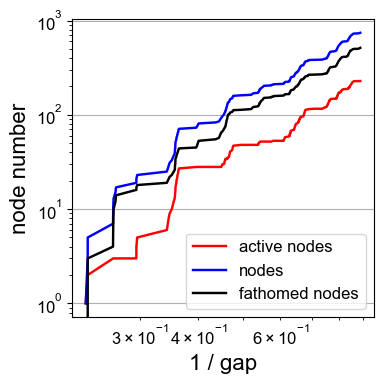

In [27]:
alg.res.plot_bb_n_gap(plot_method="loglog")

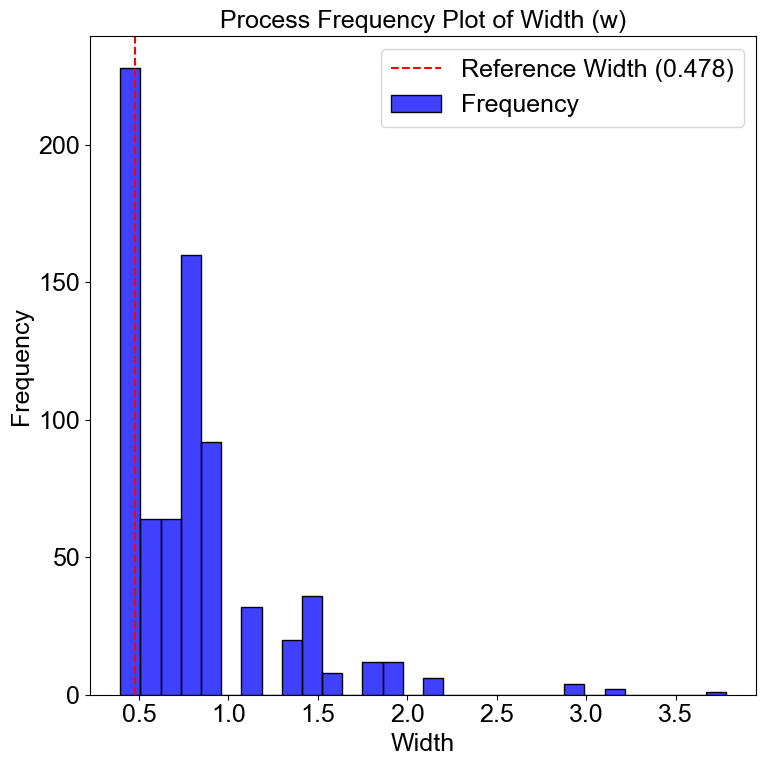

In [22]:
import seaborn as sns

sns.histplot(w, bins=30, kde=False, color='blue', label='Frequency')
plt.axvline(0.478, color='red', linestyle='dashed', linewidth=1.5, label='Reference Width (0.478)')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Process Frequency Plot of Width (w)')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Process Width vs Node Index')

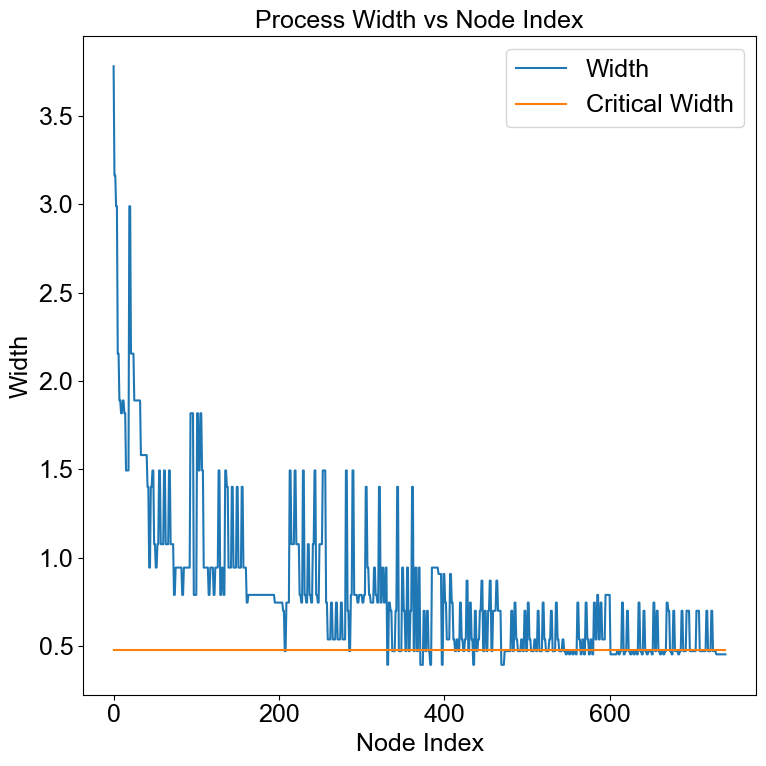

In [21]:
import matplotlib.pyplot as plt
plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-8-8', 'fontsize']])
w=[]
for i in range(0,741):
    a=alg.node_list.nodes[i].bound
    w.append(sum([(i[1]-i[0])**2 for i in a.values()])**0.5)
n = len(w)
vector_of_ones = [0.478] * n
plt.plot(w,label='Width')
plt.plot(vector_of_ones,label='Critical Width')
plt.xlabel('Node Index')
plt.ylabel('Width')
plt.legend()
plt.title('Process Width vs Node Index')

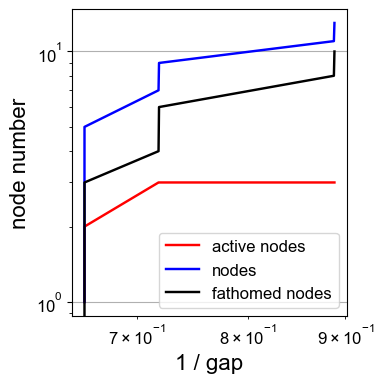

In [2]:
alg.res.plot_bb_n_gap(plot_method="loglog")

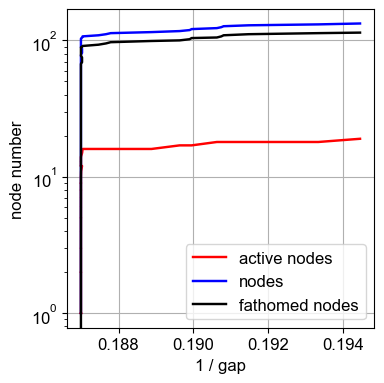

In [6]:
alg.res.plot_bb_n_gap("semilogy")

## bb node vs. gap plot

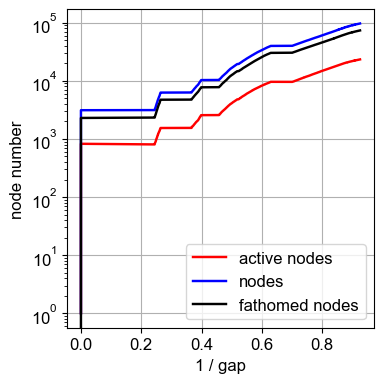

In [19]:
alg.res.plot_bb_n_gap('semilogy')


## convergence order

### solve full model to obtain optimal y value

In [2]:
from pyomo.environ import SolverFactory

ori_m = m.origin_model
opt = SolverFactory('baron')
opt.options['EPSR'] = 1e-12
res_ori = opt.solve(ori_m, tee=True)

 BARON version 24.9.12. Built: OSX-64 Thu Sep 12 14:02:57 EDT 2024
 Running on machine Jingzhis-MacBook-Air.local

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at University of System of Georgia, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value -1126.42
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration       Time (s)     Mem   Lower bound     Upper bound   Progress
          1           0.11    16MB    -12

In [3]:
from pyomo.environ import value

y_set = m.y_set.copy()
y_val = {i: value(ori_m.y[i]) for i in y_set}
v_val = value(ori_m.obj)
y_val

{'x1': 1727.2601810287592,
 'x2': 16000.0,
 'x3': 104.22661733222101,
 'x5': 2000.0}

In [5]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order

ca = HausdorffAnalyzer(alg)

eps_min = -6
eps_max = 1
steps = 7

tol = 1e-9

eps_list, distances = ca.analyze(y=y_val, y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

NameError: name 'alg' is not defined

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='$\\mathrm{diam}(Y)$', ylabel='Hausdorff metric'>)

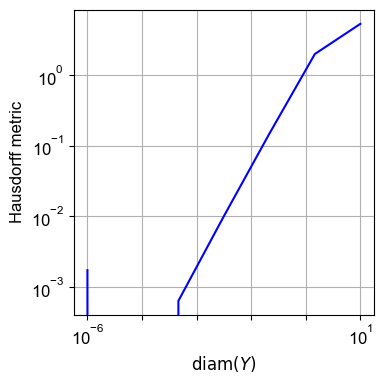

In [13]:
plot_converge_order(eps_list, distances)

## value function visualization

/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


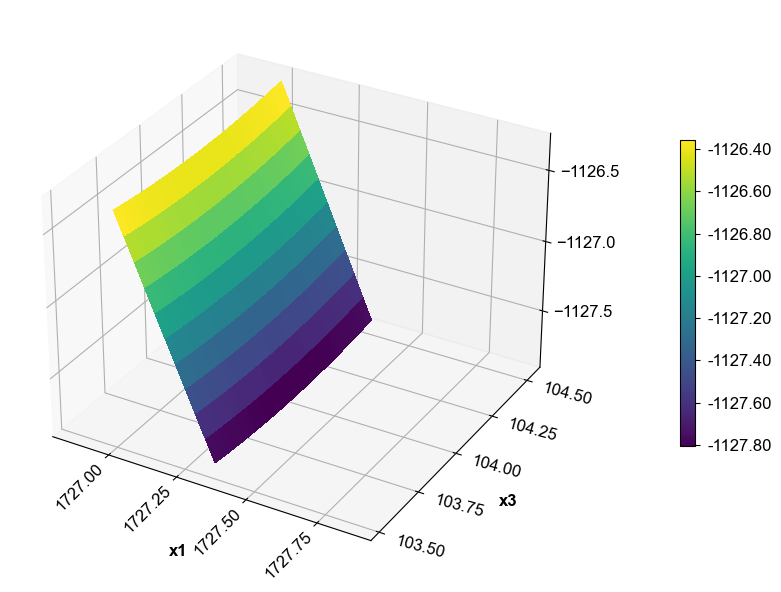

In [23]:
from src.analyses.value_function import ValueFunction

v_f_crude = ValueFunction(m, solver='baron')

y_set = m.y_set.copy()
y_val = {i: value(ori_m.y[i]) for i in y_set}

idx_1 = 'x1'
idx_2 = 'x3'

val_1 = y_val[idx_1]
val_2 = y_val[idx_2]

eps = 1

interval_1 = (val_1 - 0.5 * eps, val_1 + 0.5 * eps)
interval_2 = (val_2 - 0.5 * eps, val_2 + 0.5 * eps)

v_f_crude.calc_2D(idx_1, idx_2, y_val, interval_1=interval_1, interval_2=interval_2, step=30)
v_f_crude.plot_2D()

/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


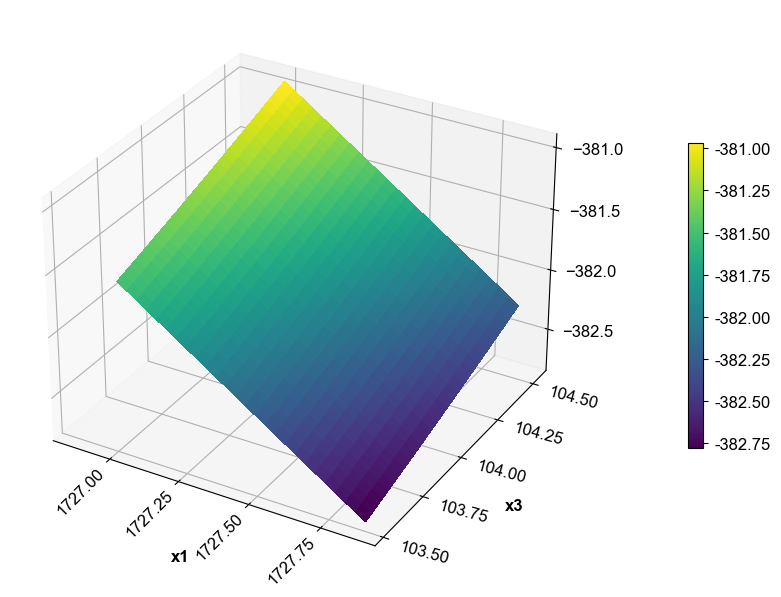

In [24]:
v_f_crude.plot_2D(0)

/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


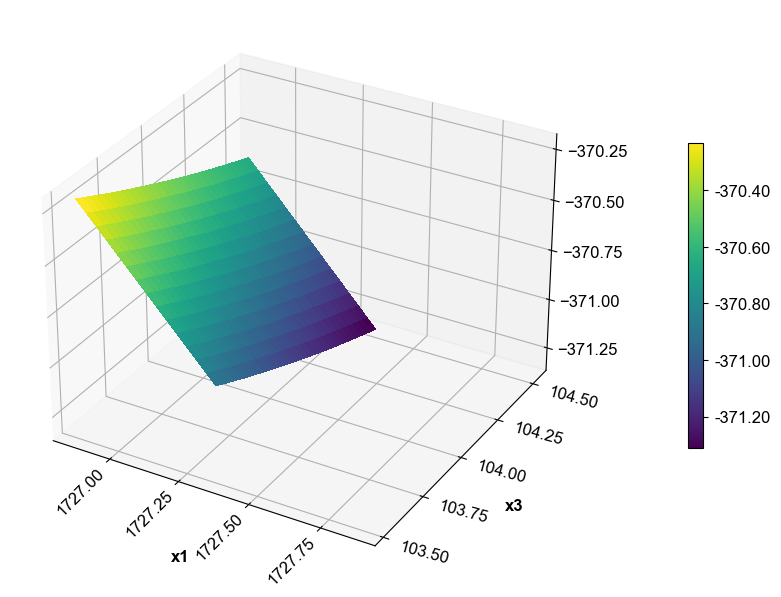

In [25]:
v_f_crude.plot_2D(1)

/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/Users/pengfeicheng/Documents/research/decomposition_project/DecompConv/env/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


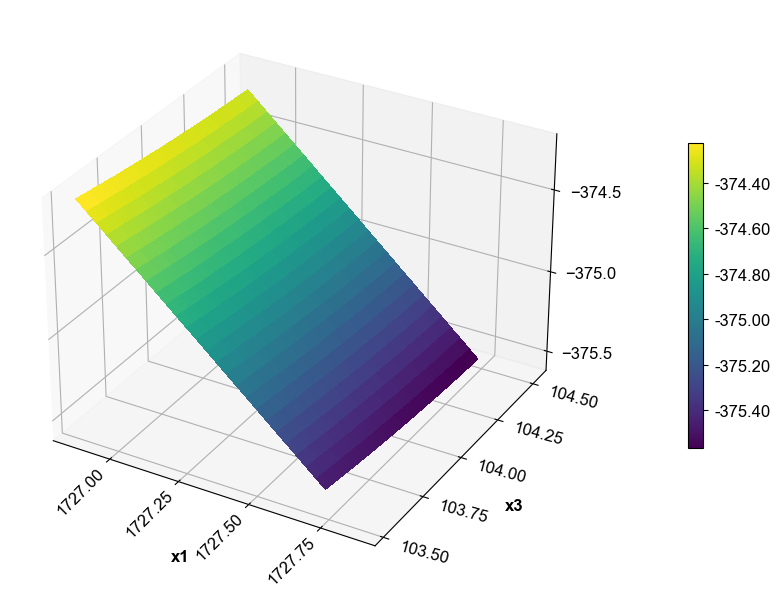

In [26]:
v_f_crude.plot_2D(2)